<a href="https://colab.research.google.com/github/NeyoxDrago/Algorithms-from-Scratch/blob/main/Linear_Regression_from_scratch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
from tqdm.notebook import tqdm
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")
from sklearn.preprocessing import StandardScaler


class CustomLinearRegression():

  def __init__(self,X,Y,
               iterations=1000,
               learning_rate=0.1,
               weights="random"):
    
    self.iterations = iterations
    self.learning_rate = learning_rate
    
    self.X = X
    self.Y = Y
    
    self.error_list = []

    if type(X) == pd.core.frame.DataFrame:
      self.X = self.X.values

    if type(Y) == pd.core.frame.DataFrame:
      self.Y = self.Y.values

    if weights == "random":
      self.W = np.random.rand(self.X.shape[1])
    elif weights == "zeros":
      self.W = np.zeros(self.X.shape[1])
    
    self.m = self.X.shape[0]

  def hypothesis(self, X_ ):
    return np.dot(X_ ,self.W)

  def error(self, y_true, y_pred):
    return np.sum((y_pred - y_true)**2)

  def calc_gradient(self, X_, y_true):
    y_pred = self.hypothesis(X_)
    e = self.error(y_true,y_pred)/X_.shape[0]
    self.error_list.append(e)
    # print(e)

    grad = np.dot(X_.T, (y_pred - y_true))
    return grad/X_.shape[0]

  def update(self,grad):
    self.W = self.W - self.learning_rate*grad*.5

  def fit(self,verbose=None,eval_set=None,use_best_model = True):
    best_score = np.inf 
    best_iteration = 0

    for i in tqdm(range(self.iterations)):
      grad = self.calc_gradient(self.X,self.Y)
      self.update(grad)
      
      if eval_set != None:
        val_score = self.evaluate(*eval_set)
        if val_score < best_score:
          best_score = val_score
          best_weights = self.W
          best_iteration = i

      if verbose != None and i % verbose == 0:
          print(f"Validation Data Score : {val_score} at iteration : {best_iteration}")

    if use_best_model and eval_set != None:
      self.W = best_weights
  
  def show_results(self):
    plt.plot(self.error_list)
    plt.xlabel("iterations")
    plt.ylabel('loss')
    plt.show()

  def evaluate(self,X,Y):
    y_pred = self.hypothesis(X)
    return self.error(Y,y_pred)/X.shape[0]
  
  def predict(self,X):
    return self.hypothesis(X)


In [232]:
data = load_boston()
X = pd.DataFrame(data['data'],columns=data['feature_names'])
Y = data['target']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [233]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=7)

Validation Data Score : 589.738680272269 at iteration : 0
Validation Data Score : 568.3758337094487 at iteration : 18
Validation Data Score : 567.0280006424149 at iteration : 18
Validation Data Score : 567.0632903121232 at iteration : 18
Validation Data Score : 567.5908516352916 at iteration : 18
Validation Data Score : 568.2756614864874 at iteration : 18
Validation Data Score : 568.969160100885 at iteration : 18
Validation Data Score : 569.6098580853127 at iteration : 18
Validation Data Score : 570.1761125265725 at iteration : 18
Validation Data Score : 570.6640046833019 at iteration : 18



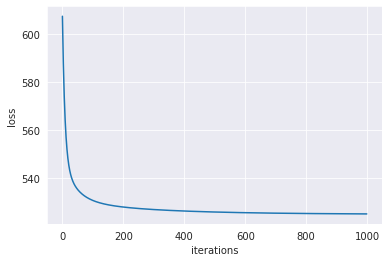

566.6496760527419

In [239]:
m = CustomLinearRegression(x_train,y_train,
                           learning_rate = 0.02,
                           iterations=1000)
m.fit(verbose=100,eval_set=(x_test,y_test))
m.show_results()
m.evaluate(x_test,y_test)